# **Cleaning Data**
*using method from https://www.justintodata.com/data-cleaning-techniques-python-guide/*

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import nltk 


In [2]:
hotel_df = pd.read_csv('hotel_bookings.csv')

hotel_df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
71336,City Hotel,1,178,2017,July,27,2,2,5,2,...,No Deposit,9.0,NaN,0,Transient,107.1,0,0,Canceled,2017-01-08
50459,City Hotel,1,83,2016,May,19,1,2,2,2,...,No Deposit,28.0,NaN,0,Transient-Party,75.0,0,1,No-Show,2016-05-01
93185,City Hotel,0,26,2016,July,29,15,1,2,2,...,No Deposit,9.0,NaN,0,Transient,151.0,0,1,Check-Out,2016-07-18
37616,Resort Hotel,0,154,2017,June,25,19,1,4,2,...,No Deposit,240.0,NaN,0,Transient-Party,110.0,0,2,Check-Out,2017-06-24
83680,City Hotel,0,3,2016,February,7,9,0,1,2,...,No Deposit,NaN,NaN,0,Transient,127.0,0,1,Check-Out,2016-02-10


In [3]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

- `.info()` gives an idea of what columns have missing data but is not the most explicit at showing which columsn have missing data
- `children`,`country`, `agent` and `company` cols have missing data

# **Let's Identify Numeric and Non-Numeric Data**

In [4]:
numeric_cols = hotel_df.select_dtypes(include=['number']).columns
print(numeric_cols)

non_numeric_cols = hotel_df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')
Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')


# **Identifying Missing Data**

## **Method #1: missing data by columns, count & percentage**

### **Missing Data Counts**

In [5]:
num_missing = hotel_df.isna().sum()

![list](missing_data(1).png)

- full list shows all columns with missing data and number of missing values
- we can see...
    - `children` has 4 missing values
    - `country` has 488 missing values
    - `agent` has 16340 missing values
    - `company` has 112593 missing values
- `children` and `country` don't have many missing (4/119390 and 488/119390 missing,respectively)
- `agent` and `company` have more significant amounts of missing data, we can explore this further by looking at the percentages of missing data


### **Percentages of Missing Data**

In [6]:
pct_missing = hotel_df.isna().mean()

![percent missing](percent_missing(1).png)

- `children` --> < 1% missing data
- `country` --> < 1% missing data
- `agent` --> ~ 13.7% missing data
- `company` --> 94.3% missing data
- this further proves that `children` and `country` have much less significant amounts of missing data than that of `agent` and `company`
- measuring percentage could be useful if you wanted to institute a rule that columns must not exceed a certain threshold of missing data

## **Method #2: Missing Data (by columns) Heatmap**

### **Seaborn Method**

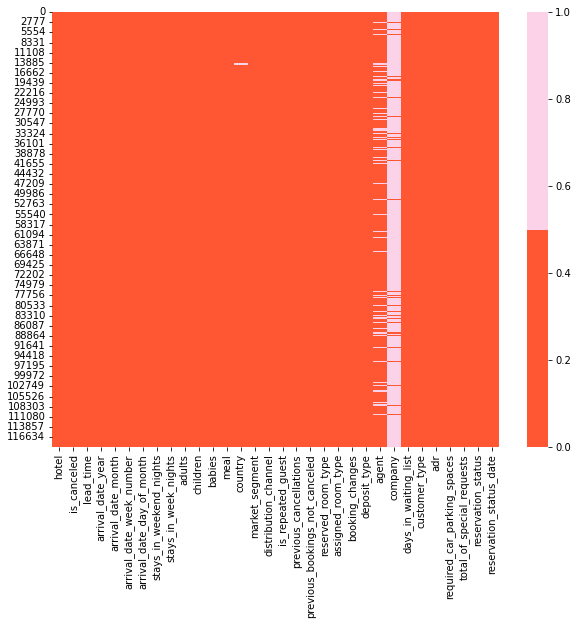

In [12]:
plt.figure(figsize=(10,8))
cols = hotel_df.columns
colors = ['#FF5733','#FCD2E8'] # <-- pink - missing, orange - not missing
sns.heatmap(hotel_df[cols].isna(), cmap=sns.color_palette(colors));

- we see this visualization helps us to see exactly which cols have missing data especially those with significant amounts
- downside is that columns like `children` which has such a small number of missing data can be overlooked through this method


### **missingno mehtod**

<AxesSubplot:>

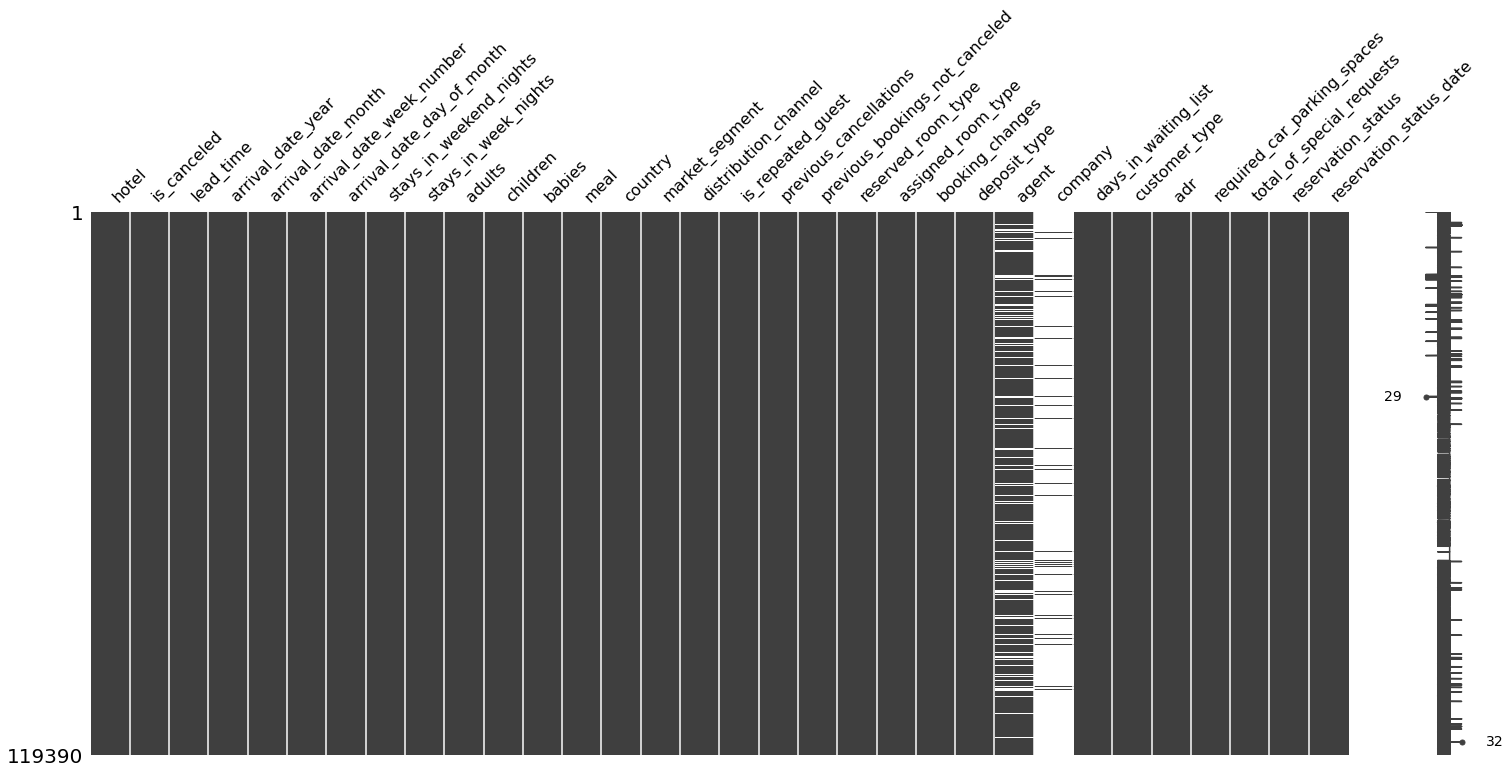

In [11]:
msno.matrix(hotel_df)

- this method yields basically the same results (without the fun colors) but once again we cannont see that `children` column contains missing data
- in this visualization you also cannot see any missing values for `country` where also you see a small dash of color to signify missing data in the seaborn method

## **Method #3: Missing Data (by rows) Histogram**

<AxesSubplot:>

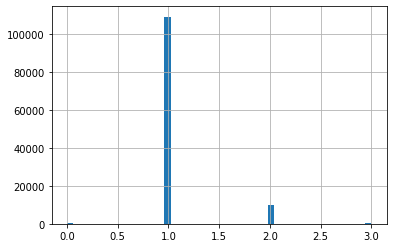

In [13]:
missing_by_row = hotel_df.isna().sum(axis='columns')
missing_by_row.hist(bins=50)